In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set()

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Reading the data

In [3]:
data = pd.read_csv('/content/drive/MyDrive/capstone_final_preprocessed_data.csv')

In [4]:
data.head()

,Unnamed: 0,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Name,Street Suffix,Description,Current Status,Current Status Date,Filed Date,Issued Date,First Construction Document Date,Number of Existing Stories,Number of Proposed Stories,Permit Expiration Date,Estimated Cost,Revised Cost,Existing Use,Existing Units,Proposed Use,Proposed Units,Plansets,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
0,0,201505065519,4,sign__erect,05/06/2015,0326,023,140,Ellis,St,"ground fl facade: to erect illuminated, electr...",expired,12/21/2017,05/06/2015,11/09/2015,11/09/2015,6.0,6.0,11/03/2016,4000.0,4000.0,tourist_hotel/motel,143.0,tourist_hotel_motel,143.0,2.0,3.0,constr_type_3,3.0,constr_type_3,3.0,tenderloin,94102.0,"(37.785719256680785, -122.40852313194863)",1380611233945
1,1,201604195146,4,sign__erect,04/19/2016,0306,007,440,Geary,St,remove (e) awning and associated signs.,issued,08/03/2017,04/19/2016,08/03/2017,08/03/2017,7.0,7.0,12/03/2017,1.0,500.0,tourist_hotel/motel,143.0,tourist_hotel_motel,143.0,2.0,3.0,constr_type_3,3.0,constr_type_3,3.0,tenderloin,94102.0,"(37.78733980600732, -122.41063199757738)",1420164406718
2,3,201611072166,8,otc_alterations_permit,11/07/2016,0156,011,1230,Pacific,Av,repair dryrot & stucco at front of bldg.,complete,07/24/2017,11/07/2016,07/18/2017,07/18/2017,2.0,2.0,07/13/2018,2000.0,2000.0,1_family_dwelling,1.0,1_family_dwelling,1.0,2.0,5.0,wood_frame_5,5.0,wood_frame_5,3.0,nob_hill,94109.0,"(37.79595867909168, -122.41557405519474)",1443574295566
3,4,201611283529,6,demolitions,11/28/2016,0342,001,950,Market,St,demolish retail/office/commercial 3-story buil...,issued,12/01/2017,11/28/2016,12/01/2017,11/20/2017,3.0,3.0,12/01/2018,100000.0,100000.0,retail_sales,1.0,retail_sales,1.0,2.0,3.0,constr_type_3,3.0,constr_type_3,6.0,tenderloin,94102.0,"(37.78315261897309, -122.40950883997789)",144548169992
4,5,201706149344,8,otc_alterations_permit,06/14/2017,4105,009,800,Indiana,St,evac maps,issued,07/06/2017,06/14/2017,07/06/2017,07/06/2017,5.0,5.0,07/01/2018,4000.0,4000.0,apartments,326.0,apartments,326.0,2.0,1.0,constr_type_1,1.0,constr_type_1,10.0,potrero_hill,94107.0,"(37.75922331346539, -122.39170402628598)",1466911170855


Dropping the unnamed column

In [5]:
data=data.drop('Unnamed: 0',axis=1)

Shape of data

In [6]:
data.shape

(182272, 34)

Basic info of the data

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182272 entries, 0 to 182271
Data columns (total 34 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   Permit Number                           182272 non-null  object 
 1   Permit Type                             182272 non-null  int64  
 2   Permit Type Definition                  182272 non-null  object 
 3   Permit Creation Date                    182272 non-null  object 
 4   Block                                   182272 non-null  object 
 5   Lot                                     182272 non-null  object 
 6   Street Number                           182272 non-null  int64  
 7   Street Name                             182272 non-null  object 
 8   Street Suffix                           182272 non-null  object 
 9   Description                             182272 non-null  object 
 10  Current Status                          1822

Total number of unique values in each column

In [8]:
for a in data.columns:
  print(a,':',data[a].nunique())

Permit Number : 166686
Permit Type : 8
Permit Type Definition : 8
Permit Creation Date : 1290
Block : 4864
Lot : 1038
Street Number : 5048
Street Name : 1686
Street Suffix : 22
Description : 121725
Current Status : 10
Current Status Date : 1306
Filed Date : 1288
Issued Date : 1289
First Construction Document Date : 1288
Number of Existing Stories : 63
Number of Proposed Stories : 63
Permit Expiration Date : 2228
Estimated Cost : 10877
Revised Cost : 12341
Existing Use : 94
Existing Units : 356
Proposed Use : 94
Proposed Units : 359
Plansets : 6
Existing Construction Type : 5
Existing Construction Type Description : 5
Proposed Construction Type : 5
Proposed Construction Type Description : 5
Supervisor District : 11
Neighborhoods - Analysis Boundaries : 41
Zipcode : 27
Location : 54882
Record ID : 182272


All the unique values in each feature

In [9]:
for a in data.columns:
  print(a,':',data[a].unique())

Permit Number : ['201505065519' '201604195146' '201611072166' ... 'M893407' '201802232172'
 'M893427']
Permit Type : [4 8 6 3 7 1 2 5]
Permit Type Definition : ['sign__erect' 'otc_alterations_permit' 'demolitions'
 'additions_alterations_or_repairs' 'wall_or_painted_sign'
 'new_construction' 'new_construction_wood_frame'
 'grade_or_quarry_or_fill_or_excavate']
Permit Creation Date : ['05/06/2015' '04/19/2016' '11/07/2016' ... '02/21/2018' '02/22/2018'
 '02/23/2018']
Block : ['0326' '0306' '0156' ... '2601' '8725' '4976']
Lot : ['023' '007' '011' ... '024K' '008I' '632']
Street Number : [ 140  440 1230 ...    0 3886 4169]
Street Name : ['Ellis' 'Geary' 'Pacific' ... 'Chain Of Lakes' 'Unknown' 'Ignacio']
Street Suffix : ['St' 'Av' 'Tr' 'Ct' 'Bl' 'Wy' 'Dr' '0' 'Cr' 'Pl' 'Ln' 'Hy' 'Rd' 'Pk' 'Al'
 'Pz' 'Wk' 'Rw' 'So' 'Sw' 'No' 'Hl']
Description : ['ground fl facade: to erect illuminated, electric, wall, single faced sign. n/a for maher ordinance 155-13.'
 'remove (e) awning and associated s

Text(0.5, 1.0, 'Total number of occurances of each current status')

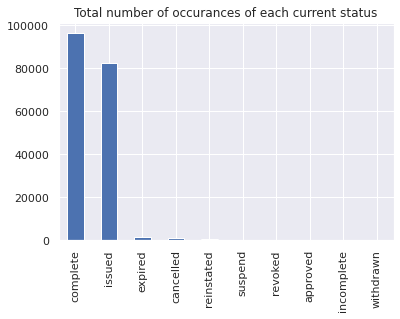

In [10]:
data['Current Status'].value_counts().plot(kind = 'bar')
plt.title('Total number of occurances of each current status')

Text(0.5, 1.0, 'Total number of occurances of each Permit type')

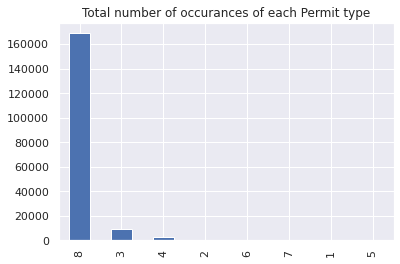

In [11]:
data['Permit Type'].value_counts().plot(kind = 'bar')
plt.title('Total number of occurances of each Permit type')

Text(0.5, 1.0, 'Plotting median of every current status according to their Estimated cost')

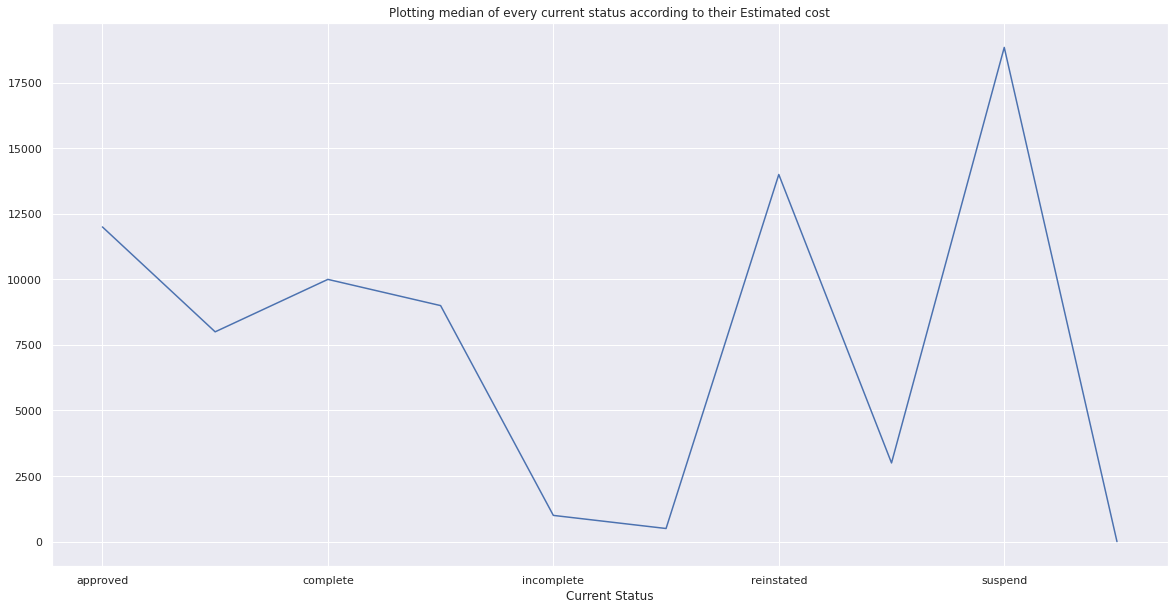

In [12]:
data.groupby('Current Status')['Estimated Cost'].median().plot(figsize=(20,10))
plt.title('Plotting median of every current status according to their Estimated cost')

Text(0.5, 1.0, 'Plotting median of every Zipcode according to their Estimated cost')

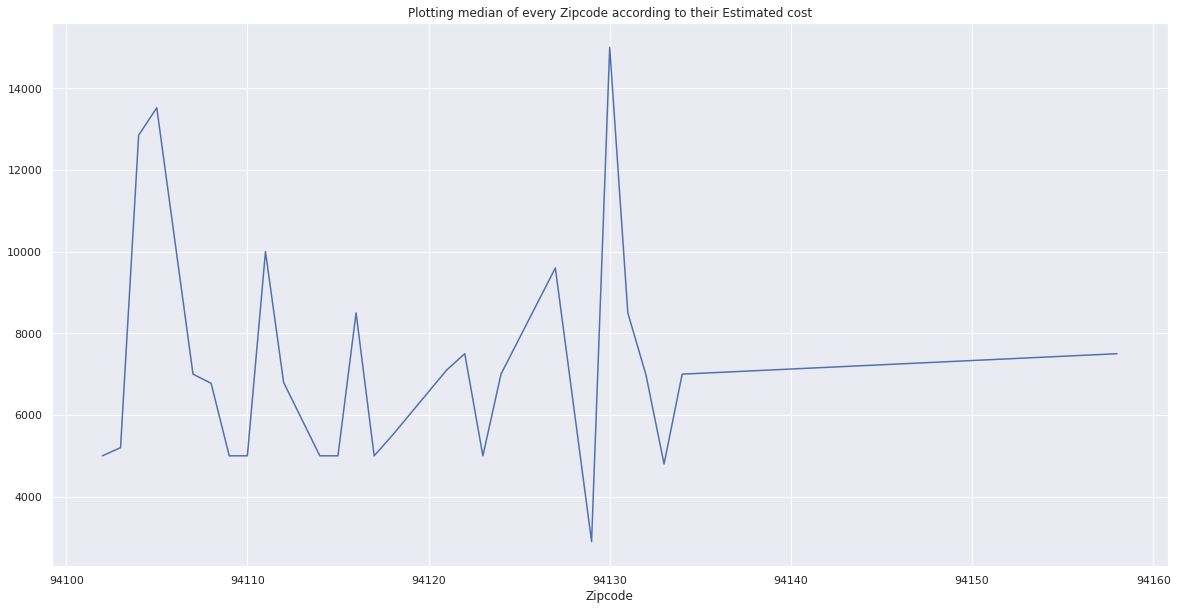

In [13]:
data.groupby('Zipcode')['Estimated Cost'].median().plot(figsize=(20,10))
plt.title('Plotting median of every Zipcode according to their Estimated cost')

Text(0.5, 1.0, 'Plotting counts of every Exisiting Construction type')

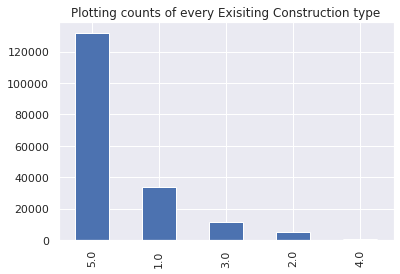

In [14]:
data['Existing Construction Type'].value_counts().plot(kind = 'bar')
plt.title('Plotting counts of every Exisiting Construction type')

Text(0.5, 1.0, 'Plot showing the permit type and their occurances')

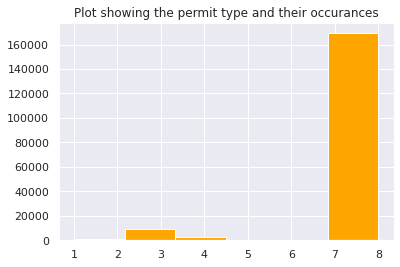

In [15]:
data.hist(column='Permit Type',bins=6,color='orange')
plt.title('Plot showing the permit type and their occurances')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa30ce02250>,
      dtype=object)

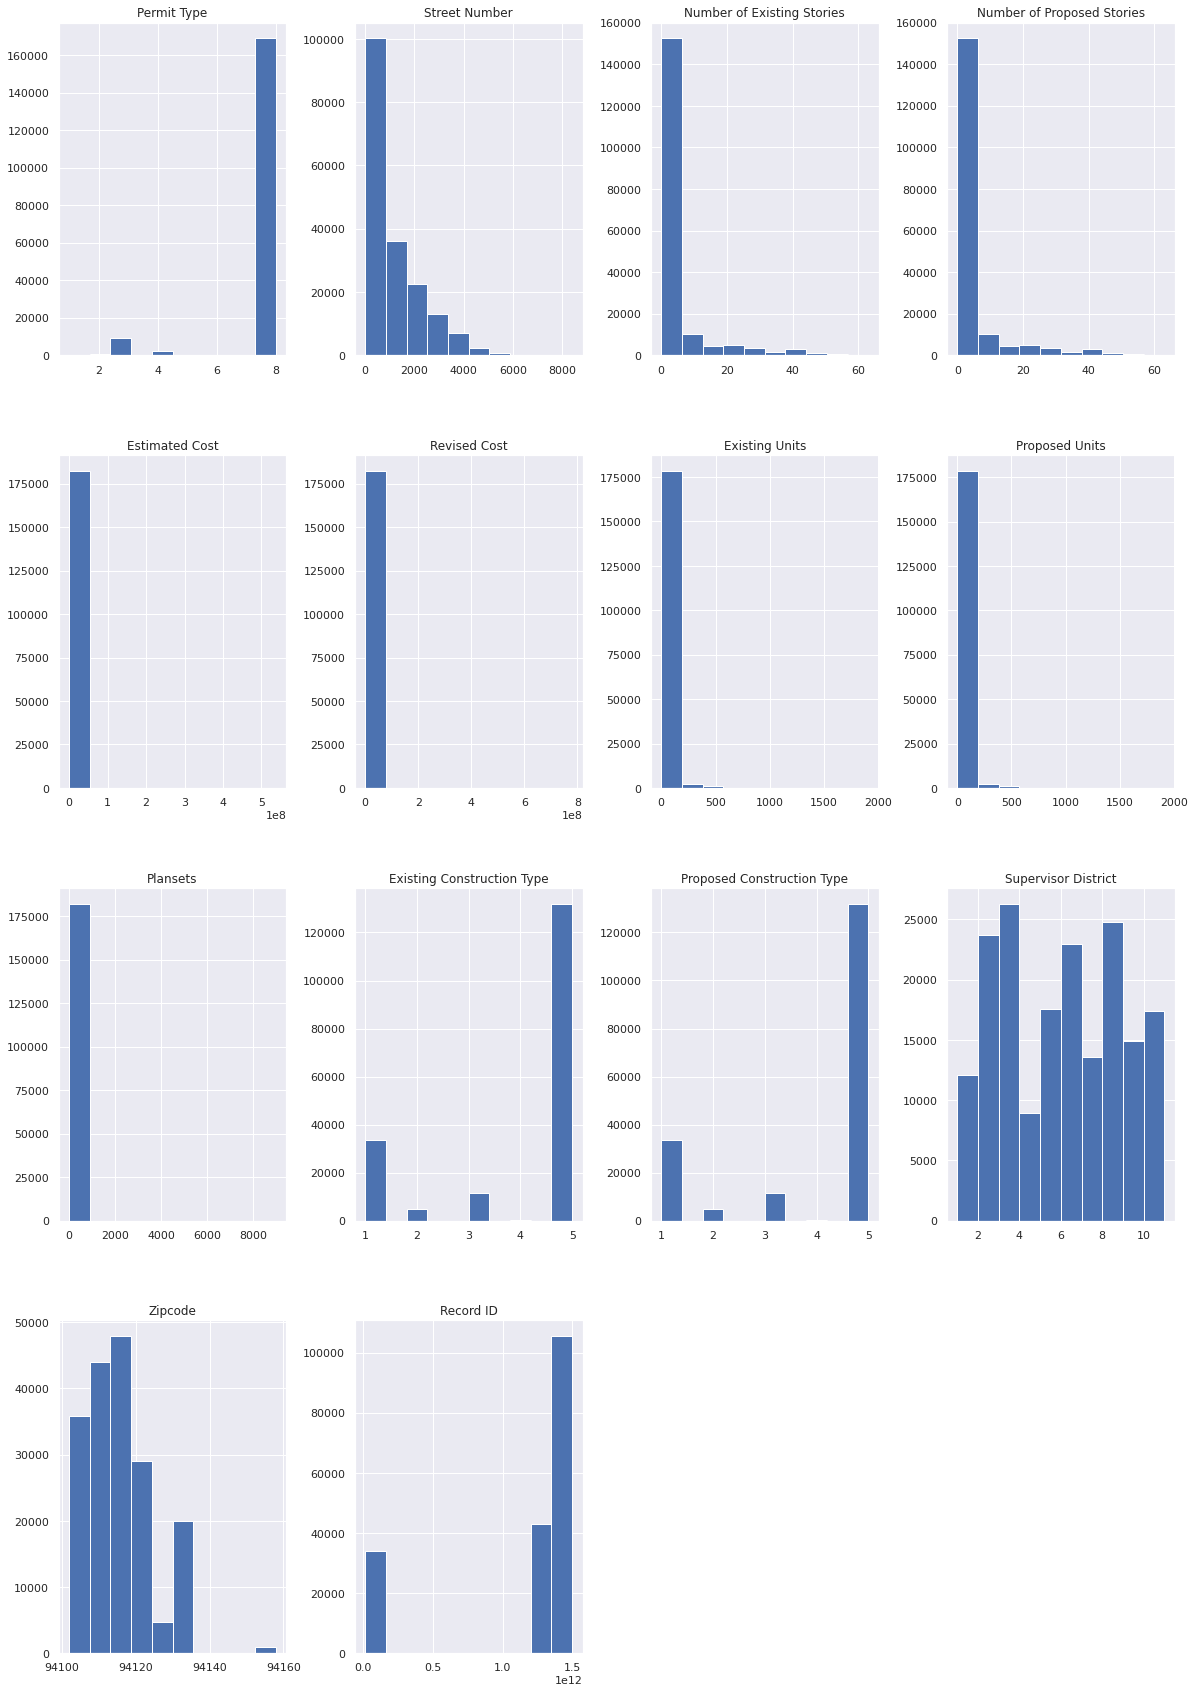

In [16]:
data.hist(figsize=(20,30))

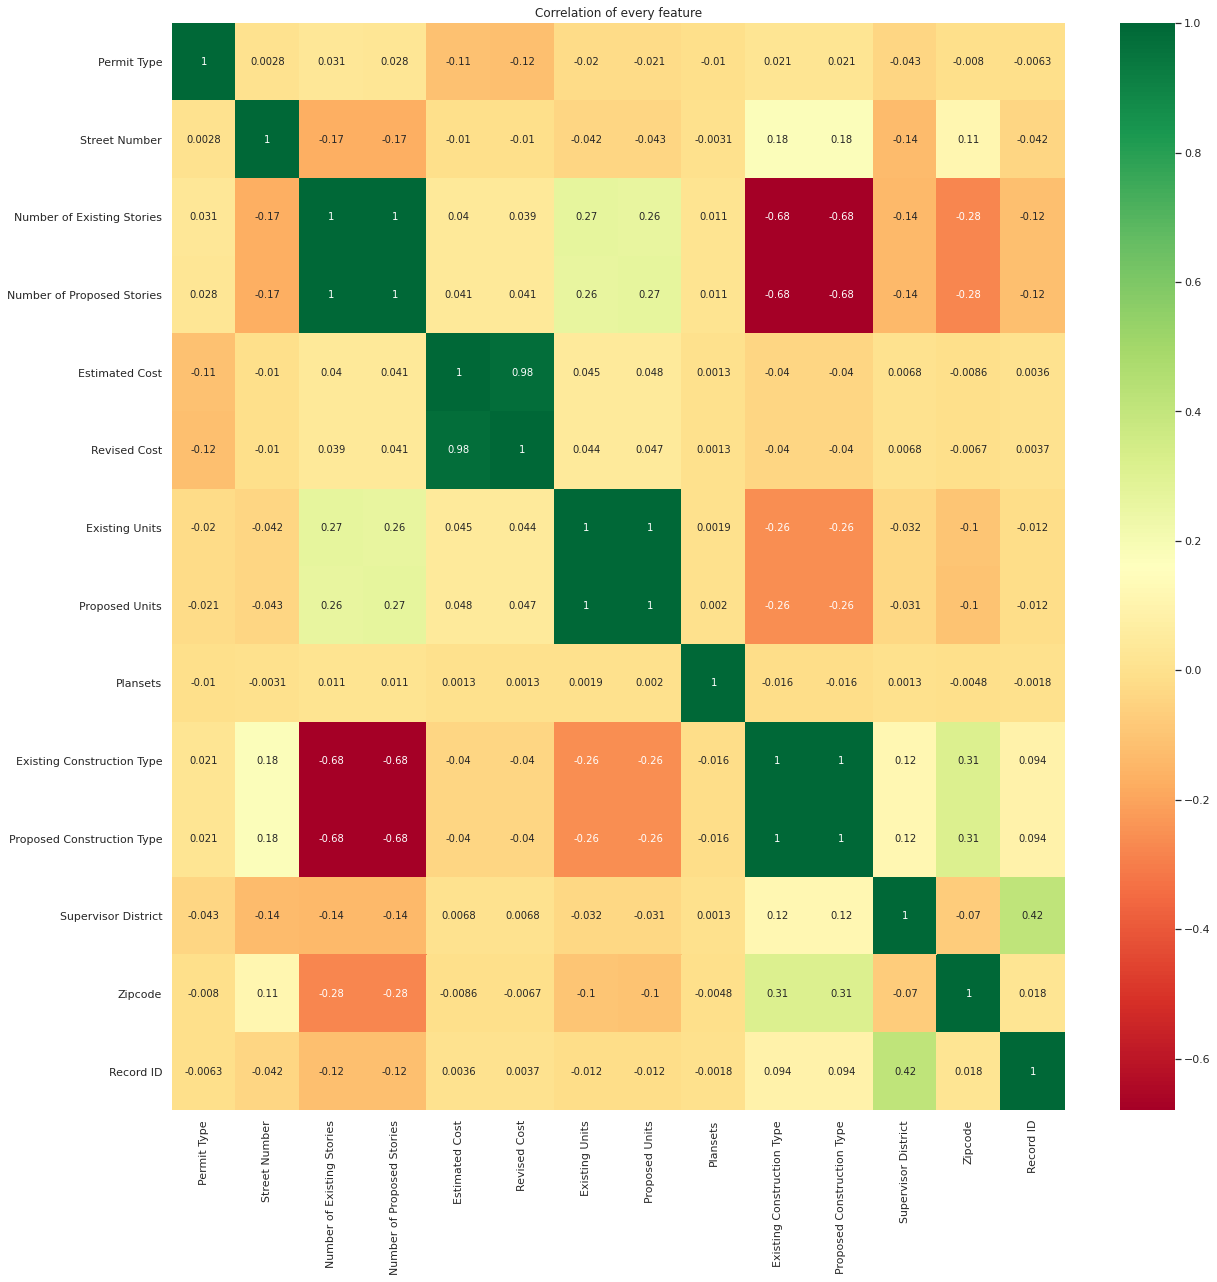

In [17]:
plt.figure(figsize = (20,20))
sns.heatmap(data.corr(), annot = True, cmap = "RdYlGn")
plt.title('Correlation of every feature')
plt.show()

Changing the datatypes of the features which are date.

In [18]:
data['Permit Creation Date'] =  pd.to_datetime(data['Permit Creation Date'], errors='coerce')

data['Current Status Date'] =  pd.to_datetime(data['Current Status Date'], errors='coerce')

data['Filed Date'] =  pd.to_datetime(data['Filed Date'], errors='coerce')

data['Issued Date'] =  pd.to_datetime(data['Issued Date'], errors='coerce')

data['First Construction Document Date'] =  pd.to_datetime(data['First Construction Document Date'], errors='coerce')

data['Permit Expiration Date'] =  pd.to_datetime(data['Permit Expiration Date'], errors='coerce')

Text(0.5, 1.0, 'Permit number size according to the Permit Creation year.')

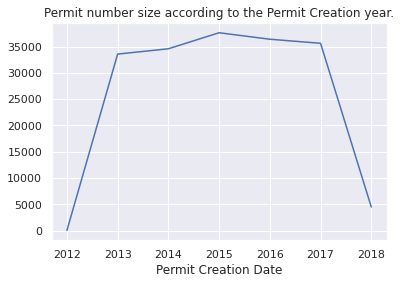

In [19]:
data.groupby(data['Permit Creation Date'].dt.year)['Permit Number'].size().plot()
plt.title('Permit number size according to the Permit Creation year.')

Text(0.5, 1.0, 'Count of Exisiting Stories according to the Current Status.')

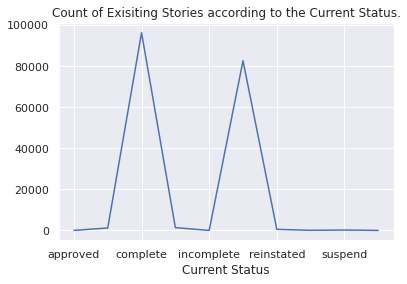

In [20]:
data.groupby(data['Current Status'])['Number of Existing Stories'].count().plot()
plt.title('Count of Exisiting Stories according to the Current Status.')

In [21]:
ss=data['Existing Construction Type'].value_counts(normalize=True)*100
ss

5.0    72.421985
1.0    18.509151
3.0     6.203915
2.0     2.620260
4.0     0.244689
Name: Existing Construction Type, dtype: float64

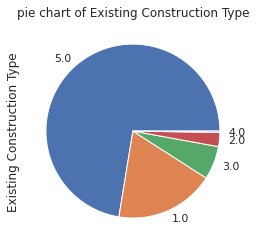

In [22]:
ss.plot.pie()
plt.title('pie chart of Existing Construction Type')
plt.show()